## Project Predictive Analytics: New York City Taxi Ride Duration Prediction<a href="#Project-Predictive-Analytics:-New-York-City-Taxi-Ride-Duration-Prediction" class="anchor-link">¶</a>

## **Marks: 40**<a href="#Marks:-40" class="anchor-link">¶</a>

------------------------------------------------------------------------

## **Context**<a href="#Context" class="anchor-link">¶</a>

------------------------------------------------------------------------

New York City taxi rides form the core of the traffic in the city of New
York. The many rides taken every day by New Yorkers in the busy city can
give us a great idea of traffic times, road blockages, and so on. A
typical taxi company faces a common problem of efficiently assigning the
cabs to passengers so that the service is hassle-free. One of the main
issues is predicting the duration of the current ride so it can predict
when the cab will be free for the next trip. Here the data set contains
various information regarding the taxi trips, its duration in New York
City. We will apply different techniques here to get insights into the
data and determine how different variables are dependent on the Trip
Duration.

------------------------------------------------------------------------

## **Objective**<a href="#Objective" class="anchor-link">¶</a>

------------------------------------------------------------------------

-   To Build a predictive model, for predicting the duration for the
    taxi ride.
-   Use Automated feature engineering to create new features

------------------------------------------------------------------------

## **Dataset**<a href="#Dataset" class="anchor-link">¶</a>

------------------------------------------------------------------------

The `trips` table has the following fields

-   `id` which uniquely identifies the trip
-   `vendor_id` is the taxi cab company - in our case study we have data
    from three different cab companies
-   `pickup_datetime` the time stamp for pickup
-   `dropoff_datetime` the time stamp for drop-off
-   `passenger_count` the number of passengers for the trip
-   `trip_distance` total distance of the trip in miles
-   `pickup_longitude` the longitude for pickup
-   `pickup_latitude` the latitude for pickup
-   `dropoff_longitude`the longitude of dropoff
-   `dropoff_latitude` the latitude of dropoff
-   `payment_type` a numeric code signifying how the passenger paid for
    the trip. 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown
    6= Voided
-   `trip_duration` this is the duration we would like to predict using
    other fields
-   `pickup_neighborhood` a one or two letter id of the neighborhood
    where the trip started
-   `dropoff_neighborhood` a one or two letter id of the neighborhood
    where the trip ended

### We will do the following steps:<a href="#We-will-do-the-following-steps:" class="anchor-link">¶</a>

-   Install the dependencies
-   Load the data as pandas dataframe
-   Perform EDA on the dataset
-   Build features with Deep Feature Synthesis using the
    [featuretools](https://featuretools.com) package. We will start with
    simple features and incrementally improve the feature definitions
    and examine the accuracy of the system

#### Uncomment the code given below, and run the line of code to install featuretools library<a href="#Uncomment-the-code-given-below,-and-run-the-line-of-code-to-install-featuretools-library" class="anchor-link">¶</a>

In \[71\]:

    # Uncomment the code given below, and run the line of code to install featuretools library

    !pip install featuretools==0.27.0

    Requirement already satisfied: featuretools==0.27.0 in c:\users\acer\anaconda3\lib\site-packages (0.27.0)
    Requirement already satisfied: numpy>=1.16.6 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (1.20.3)
    Requirement already satisfied: click>=7.0.0 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (8.0.3)
    Requirement already satisfied: tqdm>=4.32.0 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (4.62.3)
    Requirement already satisfied: dask[dataframe]>=2.12.0 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (2021.10.0)
    Requirement already satisfied: pandas<2.0.0,>=1.2.0 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (1.3.4)
    Requirement already satisfied: cloudpickle>=0.4.0 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (2.0.0)
    Requirement already satisfied: distributed>=2.12.0 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (2021.10.0)
    Requirement already satisfied: psutil>=5.6.6 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (5.8.0)
    Requirement already satisfied: pyyaml>=5.4 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (6.0)
    Requirement already satisfied: scipy>=1.3.2 in c:\users\acer\anaconda3\lib\site-packages (from featuretools==0.27.0) (1.7.1)
    Requirement already satisfied: colorama in c:\users\acer\anaconda3\lib\site-packages (from click>=7.0.0->featuretools==0.27.0) (0.4.4)
    Requirement already satisfied: fsspec>=0.6.0 in c:\users\acer\anaconda3\lib\site-packages (from dask[dataframe]>=2.12.0->featuretools==0.27.0) (2021.10.1)
    Requirement already satisfied: packaging>=20.0 in c:\users\acer\anaconda3\lib\site-packages (from dask[dataframe]>=2.12.0->featuretools==0.27.0) (21.0)
    Requirement already satisfied: partd>=0.3.10 in c:\users\acer\anaconda3\lib\site-packages (from dask[dataframe]>=2.12.0->featuretools==0.27.0) (1.2.0)
    Requirement already satisfied: toolz>=0.8.2 in c:\users\acer\anaconda3\lib\site-packages (from dask[dataframe]>=2.12.0->featuretools==0.27.0) (0.11.1)
    Requirement already satisfied: jinja2 in c:\users\acer\anaconda3\lib\site-packages (from distributed>=2.12.0->featuretools==0.27.0) (2.11.3)
    Requirement already satisfied: tornado>=6.0.3 in c:\users\acer\anaconda3\lib\site-packages (from distributed>=2.12.0->featuretools==0.27.0) (6.1)
    Requirement already satisfied: setuptools in c:\users\acer\anaconda3\lib\site-packages (from distributed>=2.12.0->featuretools==0.27.0) (58.0.4)
    Requirement already satisfied: zict>=0.1.3 in c:\users\acer\anaconda3\lib\site-packages (from distributed>=2.12.0->featuretools==0.27.0) (2.0.0)
    Requirement already satisfied: msgpack>=0.6.0 in c:\users\acer\anaconda3\lib\site-packages (from distributed>=2.12.0->featuretools==0.27.0) (1.0.2)
    Requirement already satisfied: tblib>=1.6.0 in c:\users\acer\anaconda3\lib\site-packages (from distributed>=2.12.0->featuretools==0.27.0) (1.7.0)
    Requirement already satisfied: sortedcontainers!=2.0.0,!=2.0.1 in c:\users\acer\anaconda3\lib\site-packages (from distributed>=2.12.0->featuretools==0.27.0) (2.4.0)
    Requirement already satisfied: pyparsing>=2.0.2 in c:\users\acer\anaconda3\lib\site-packages (from packaging>=20.0->dask[dataframe]>=2.12.0->featuretools==0.27.0) (3.0.4)
    Requirement already satisfied: python-dateutil>=2.7.3 in c:\users\acer\anaconda3\lib\site-packages (from pandas<2.0.0,>=1.2.0->featuretools==0.27.0) (2.8.2)
    Requirement already satisfied: pytz>=2017.3 in c:\users\acer\anaconda3\lib\site-packages (from pandas<2.0.0,>=1.2.0->featuretools==0.27.0) (2021.3)
    Requirement already satisfied: locket in c:\users\acer\anaconda3\lib\site-packages\locket-0.2.1-py3.9.egg (from partd>=0.3.10->dask[dataframe]>=2.12.0->featuretools==0.27.0) (0.2.1)
    Requirement already satisfied: six>=1.5 in c:\users\acer\anaconda3\lib\site-packages (from python-dateutil>=2.7.3->pandas<2.0.0,>=1.2.0->featuretools==0.27.0) (1.16.0)
    Requirement already satisfied: heapdict in c:\users\acer\anaconda3\lib\site-packages (from zict>=0.1.3->distributed>=2.12.0->featuretools==0.27.0) (1.0.1)
    Requirement already satisfied: MarkupSafe>=0.23 in c:\users\acer\anaconda3\lib\site-packages (from jinja2->distributed>=2.12.0->featuretools==0.27.0) (1.1.1)

### Note: If !pip install featuretools doesn't work, please install using the anaconda prompt by typing the following command in anaconda prompt<a href="#Note:-If-!pip-install-featuretools-doesn&#39;t-work,-please-install-using-the-anaconda-prompt-by-typing-the-following-command-in-anaconda-prompt" class="anchor-link">¶</a>

      conda install -c conda-forge featuretools==0.27.0

### Importing libraries<a href="#Importing-libraries" class="anchor-link">¶</a>

In \[111\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    #Feataurestools for feature engineering
    import featuretools as ft

    from sklearn.model_selection import train_test_split
    from sklearn.impute import SimpleImputer

    # Importing gradient boosting regressor, to make prediction
    from sklearn.metrics import r2_score
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.tree import DecisionTreeRegressor

    #importing primitives
    from featuretools.primitives import (Minute, Hour, Day, Month,
                                         Weekday, IsWeekend, Count, Sum, Mean, Median, Std, Min, Max)

    print(ft.__version__)
    %load_ext autoreload
    %autoreload 2

    0.27.0
    The autoreload extension is already loaded. To reload it, use:
      %reload_ext autoreload

In \[112\]:

    # set global random seed
    np.random.seed(40)

    # To load the dataset
    def load_nyc_taxi_data():
        trips = pd.read_csv('trips.csv',
                            parse_dates=["pickup_datetime","dropoff_datetime"],
                            dtype={'vendor_id':"category",'passenger_count':'int64'},
                            encoding='utf-8')
        trips["payment_type"] = trips["payment_type"].apply(str)
        trips = trips.dropna(axis=0, how='any', subset=['trip_duration'])

        pickup_neighborhoods = pd.read_csv("pickup_neighborhoods.csv", encoding='utf-8')
        dropoff_neighborhoods = pd.read_csv("dropoff_neighborhoods.csv", encoding='utf-8')

        return trips, pickup_neighborhoods, dropoff_neighborhoods

    ### To preview first five rows. 
    def preview(df, n=5):
        """return n rows that have fewest number of nulls"""
        order = df.isnull().sum(axis=1).sort_values().head(n).index
        return df.loc[order]



    #to compute features using automated feature engineering. 
    def compute_features(features, cutoff_time):
        # shuffle so we don't see encoded features in the front or backs

        np.random.shuffle(features)
        feature_matrix = ft.calculate_feature_matrix(features,
                                                     cutoff_time=cutoff_time,
                                                     approximate='36d',
                                                     verbose=True)
        print("Finishing computing...")
        feature_matrix, features = ft.encode_features(feature_matrix, features,
                                                      to_encode=["pickup_neighborhood", "dropoff_neighborhood"],
                                                      include_unknown=False)
        return feature_matrix


    #to generate train and test dataset
    def get_train_test_fm(feature_matrix, percentage):
        nrows = feature_matrix.shape[0]
        head = int(nrows * percentage)
        tail = nrows-head
        X_train = feature_matrix.head(head)
        y_train = X_train['trip_duration']
        X_train = X_train.drop(['trip_duration'], axis=1)
        imp = SimpleImputer()
        X_train = imp.fit_transform(X_train)
        X_test = feature_matrix.tail(tail)
        y_test = X_test['trip_duration']
        X_test = X_test.drop(['trip_duration'], axis=1)
        X_test = imp.transform(X_test)

        return (X_train, y_train, X_test,y_test)



    #to see the feature importance of variables in the final model
    def feature_importances(model, feature_names, n=5):
        importances = model.feature_importances_
        zipped = sorted(zip(feature_names, importances), key=lambda x: -x[1])
        for i, f in enumerate(zipped[:n]):
            print("%d: Feature: %s, %.3f" % (i+1, f[0], f[1]))

### Load the Datasets<a href="#Load-the-Datasets" class="anchor-link">¶</a>

In \[113\]:

    trips, pickup_neighborhoods, dropoff_neighborhoods = load_nyc_taxi_data()
    preview(trips, 10)

Out\[113\]:

|        | id     | vendor_id | pickup_datetime     | dropoff_datetime    | passenger_count | trip_distance | pickup_longitude | pickup_latitude | dropoff_longitude | dropoff_latitude | payment_type | trip_duration | pickup_neighborhood | dropoff_neighborhood |
|--------|--------|-----------|---------------------|---------------------|-----------------|---------------|------------------|-----------------|-------------------|------------------|--------------|---------------|---------------------|----------------------|
| 0      | 0      | 2         | 2016-01-01 00:00:19 | 2016-01-01 00:06:31 | 3               | 1.32          | -73.961258       | 40.796200       | -73.950050        | 40.787312        | 2            | 372.0         | AH                  | C                    |
| 649598 | 679634 | 1         | 2016-04-30 11:45:59 | 2016-04-30 11:47:47 | 1               | 0.50          | -73.994919       | 40.755226       | -74.000351        | 40.747917        | 1            | 108.0         | D                   | AG                   |
| 649599 | 679635 | 2         | 2016-04-30 11:46:04 | 2016-04-30 11:47:41 | 2               | 0.33          | -73.978935       | 40.777172       | -73.981888        | 40.773136        | 2            | 97.0          | AV                  | AV                   |
| 649600 | 679636 | 2         | 2016-04-30 11:46:39 | 2016-04-30 11:58:02 | 1               | 1.78          | -73.998207       | 40.745201       | -73.990265        | 40.729023        | 2            | 683.0         | AP                  | H                    |
| 649601 | 679637 | 2         | 2016-04-30 11:46:44 | 2016-04-30 11:55:42 | 1               | 1.40          | -73.987129       | 40.739429       | -74.007370        | 40.743511        | 2            | 538.0         | R                   | Q                    |
| 649602 | 679638 | 2         | 2016-04-30 11:47:30 | 2016-04-30 11:54:00 | 1               | 1.12          | -73.942375       | 40.790768       | -73.952095        | 40.777145        | 2            | 390.0         | J                   | AM                   |
| 649603 | 679639 | 1         | 2016-04-30 11:47:38 | 2016-04-30 11:57:22 | 2               | 1.90          | -73.960800       | 40.769920       | -73.978966        | 40.785698        | 1            | 584.0         | K                   | I                    |
| 649604 | 679640 | 1         | 2016-04-30 11:47:49 | 2016-04-30 12:01:05 | 1               | 4.30          | -74.013885       | 40.709515       | -73.987213        | 40.722343        | 2            | 796.0         | AU                  | AC                   |
| 649605 | 679641 | 1         | 2016-04-30 11:48:17 | 2016-04-30 12:01:02 | 1               | 2.90          | -73.975426       | 40.757584       | -73.999016        | 40.722027        | 1            | 765.0         | A                   | X                    |
| 649606 | 679642 | 1         | 2016-04-30 11:49:44 | 2016-04-30 12:00:03 | 1               | 1.30          | -73.989815       | 40.750454       | -74.000473        | 40.762352        | 2            | 619.0         | D                   | P                    |

### Display first five rows<a href="#Display-first-five-rows" class="anchor-link">¶</a>

In \[114\]:

    trips.head()

Out\[114\]:

|     | id  | vendor_id | pickup_datetime     | dropoff_datetime    | passenger_count | trip_distance | pickup_longitude | pickup_latitude | dropoff_longitude | dropoff_latitude | payment_type | trip_duration | pickup_neighborhood | dropoff_neighborhood |
|-----|-----|-----------|---------------------|---------------------|-----------------|---------------|------------------|-----------------|-------------------|------------------|--------------|---------------|---------------------|----------------------|
| 0   | 0   | 2         | 2016-01-01 00:00:19 | 2016-01-01 00:06:31 | 3               | 1.32          | -73.961258       | 40.796200       | -73.950050        | 40.787312        | 2            | 372.0         | AH                  | C                    |
| 1   | 1   | 2         | 2016-01-01 00:01:45 | 2016-01-01 00:27:38 | 1               | 13.70         | -73.956169       | 40.707756       | -73.939949        | 40.839558        | 1            | 1553.0        | Z                   | S                    |
| 2   | 2   | 1         | 2016-01-01 00:01:47 | 2016-01-01 00:21:51 | 2               | 5.30          | -73.993103       | 40.752632       | -73.953903        | 40.816540        | 2            | 1204.0        | D                   | AL                   |
| 3   | 3   | 2         | 2016-01-01 00:01:48 | 2016-01-01 00:16:06 | 1               | 7.19          | -73.983009       | 40.731419       | -73.930969        | 40.808460        | 2            | 858.0         | AT                  | J                    |
| 4   | 4   | 1         | 2016-01-01 00:02:49 | 2016-01-01 00:20:45 | 2               | 2.90          | -74.004631       | 40.747234       | -73.976395        | 40.777237        | 1            | 1076.0        | AG                  | AV                   |

### Display info of the dataset<a href="#Display-info-of-the-dataset" class="anchor-link">¶</a>

In \[115\]:

    #checking the info of the dataset
    trips.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 974409 entries, 0 to 974408
    Data columns (total 14 columns):
     #   Column                Non-Null Count   Dtype         
    ---  ------                --------------   -----         
     0   id                    974409 non-null  int64         
     1   vendor_id             974409 non-null  category      
     2   pickup_datetime       974409 non-null  datetime64[ns]
     3   dropoff_datetime      974409 non-null  datetime64[ns]
     4   passenger_count       974409 non-null  int64         
     5   trip_distance         974409 non-null  float64       
     6   pickup_longitude      974409 non-null  float64       
     7   pickup_latitude       974409 non-null  float64       
     8   dropoff_longitude     974409 non-null  float64       
     9   dropoff_latitude      974409 non-null  float64       
     10  payment_type          974409 non-null  object        
     11  trip_duration         974409 non-null  float64       
     12  pickup_neighborhood   974409 non-null  object        
     13  dropoff_neighborhood  974409 non-null  object        
    dtypes: category(1), datetime64[ns](2), float64(6), int64(2), object(3)
    memory usage: 137.3+ MB

-   There are 974409 non null values in the dataset

### Check the number of unique values in the dataset.<a href="#Check-the-number-of-unique-values-in-the-dataset." class="anchor-link">¶</a>

In \[116\]:

    # Check the uniques values in each columns
    trips.nunique()

Out\[116\]:

    id                      974409
    vendor_id                    2
    pickup_datetime         939015
    dropoff_datetime        938873
    passenger_count              8
    trip_distance             2503
    pickup_longitude         20222
    pickup_latitude          40692
    dropoff_longitude        26127
    dropoff_latitude         50077
    payment_type                 4
    trip_duration             3607
    pickup_neighborhood         49
    dropoff_neighborhood        49
    dtype: int64

-   vendor_id has only 2 unique values, implies there are only 2 major
    taxi vendors are there.
-   Passenger count has 8 unique values and payment type have 4.
-   There are 49 neighborhood in the dataset, from where either a pickup
    or dropoff is happening.

### Question 1 : Check summary statistics of the dataset (1 Mark)<a href="#Question-1-:-Check-summary-statistics-of-the-dataset-(1-Mark)" class="anchor-link">¶</a>

In \[117\]:

    #chekcing the descriptive stats of the data

    #Remove _________ and complete the code

    trips.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 974409 entries, 0 to 974408
    Data columns (total 14 columns):
     #   Column                Non-Null Count   Dtype         
    ---  ------                --------------   -----         
     0   id                    974409 non-null  int64         
     1   vendor_id             974409 non-null  category      
     2   pickup_datetime       974409 non-null  datetime64[ns]
     3   dropoff_datetime      974409 non-null  datetime64[ns]
     4   passenger_count       974409 non-null  int64         
     5   trip_distance         974409 non-null  float64       
     6   pickup_longitude      974409 non-null  float64       
     7   pickup_latitude       974409 non-null  float64       
     8   dropoff_longitude     974409 non-null  float64       
     9   dropoff_latitude      974409 non-null  float64       
     10  payment_type          974409 non-null  object        
     11  trip_duration         974409 non-null  float64       
     12  pickup_neighborhood   974409 non-null  object        
     13  dropoff_neighborhood  974409 non-null  object        
    dtypes: category(1), datetime64[ns](2), float64(6), int64(2), object(3)
    memory usage: 137.3+ MB

**Write your answers here:**\_****

#### Checking for the rows for which trip_distance is 0<a href="#Checking-for-the-rows-for-which-trip_distance-is-0" class="anchor-link">¶</a>

In \[118\]:

    #Chekcing the rows where trip distance is 0
    trips[trips['trip_distance']==0]

Out\[118\]:

|        | id      | vendor_id | pickup_datetime     | dropoff_datetime    | passenger_count | trip_distance | pickup_longitude | pickup_latitude | dropoff_longitude | dropoff_latitude | payment_type | trip_duration | pickup_neighborhood | dropoff_neighborhood |
|--------|---------|-----------|---------------------|---------------------|-----------------|---------------|------------------|-----------------|-------------------|------------------|--------------|---------------|---------------------|----------------------|
| 852    | 880     | 1         | 2016-01-01 02:15:56 | 2016-01-01 02:16:17 | 1               | 0.0           | -74.002586       | 40.750298       | -74.002861        | 40.750446        | 2            | 21.0          | AG                  | AG                   |
| 1079   | 1116    | 1         | 2016-01-01 03:01:10 | 2016-01-01 03:03:26 | 1               | 0.0           | -73.987831       | 40.728558       | -73.988747        | 40.727280        | 3            | 136.0         | H                   | H                    |
| 1408   | 1455    | 2         | 2016-01-01 04:09:43 | 2016-01-01 04:10:48 | 1               | 0.0           | -73.985893       | 40.763649       | -73.985741        | 40.763672        | 2            | 65.0          | AR                  | AR                   |
| 1440   | 1488    | 1         | 2016-01-01 04:16:54 | 2016-01-01 04:16:57 | 1               | 0.0           | -74.014198       | 40.709988       | -74.014198        | 40.709988        | 3            | 3.0           | AU                  | AU                   |
| 1510   | 1558    | 1         | 2016-01-01 04:36:03 | 2016-01-01 04:36:16 | 1               | 0.0           | -73.952507       | 40.817329       | -73.952499        | 40.817322        | 2            | 13.0          | AL                  | AL                   |
| ...    | ...     | ...       | ...                 | ...                 | ...             | ...           | ...              | ...             | ...               | ...              | ...          | ...           | ...                 | ...                  |
| 972967 | 1018490 | 1         | 2016-06-30 19:09:44 | 2016-06-30 19:22:21 | 1               | 0.0           | -73.945480       | 40.751400       | -73.945496        | 40.751549        | 2            | 757.0         | AN                  | AN                   |
| 973384 | 1018928 | 2         | 2016-06-30 20:35:08 | 2016-06-30 20:35:10 | 1               | 0.0           | -73.983864       | 40.693813       | -73.983910        | 40.693817        | 1            | 2.0           | AS                  | AS                   |
| 973555 | 1019105 | 2         | 2016-06-30 21:13:50 | 2016-06-30 21:14:05 | 1               | 0.0           | -74.008789       | 40.708740       | -74.008659        | 40.708858        | 1            | 15.0          | AU                  | AU                   |
| 973607 | 1019159 | 2         | 2016-06-30 21:24:23 | 2016-06-30 21:37:40 | 1               | 0.0           | -73.974510       | 40.778297       | -73.977272        | 40.754047        | 1            | 797.0         | I                   | AD                   |
| 973898 | 1019464 | 2         | 2016-06-30 22:20:27 | 2016-06-30 22:43:11 | 2               | 0.0           | -73.978920       | 40.688160       | -73.992317        | 40.749359        | 1            | 1364.0        | V                   | D                    |

3807 rows × 14 columns

-   We can observe that, where trip distance is 0 trip duration is not
    0, hence we can replace those values.
-   There are 3807 such rows

#### Replacing the 0 values with median of the trip distance<a href="#Replacing-the-0-values-with-median-of-the-trip-distance" class="anchor-link">¶</a>

In \[119\]:

    trips['trip_distance']=trips['trip_distance'].replace(0,trips['trip_distance'].median())

In \[120\]:

    trips[trips['trip_distance']==0].count()

Out\[120\]:

    id                      0
    vendor_id               0
    pickup_datetime         0
    dropoff_datetime        0
    passenger_count         0
    trip_distance           0
    pickup_longitude        0
    pickup_latitude         0
    dropoff_longitude       0
    dropoff_latitude        0
    payment_type            0
    trip_duration           0
    pickup_neighborhood     0
    dropoff_neighborhood    0
    dtype: int64

#### Checking for the rows for which trip_duration is 0<a href="#Checking-for-the-rows-for-which-trip_duration-is-0" class="anchor-link">¶</a>

In \[121\]:

    trips[trips['trip_duration']==0].head()

Out\[121\]:

|        | id     | vendor_id | pickup_datetime     | dropoff_datetime    | passenger_count | trip_distance | pickup_longitude | pickup_latitude | dropoff_longitude | dropoff_latitude | payment_type | trip_duration | pickup_neighborhood | dropoff_neighborhood |
|--------|--------|-----------|---------------------|---------------------|-----------------|---------------|------------------|-----------------|-------------------|------------------|--------------|---------------|---------------------|----------------------|
| 44446  | 46325  | 1         | 2016-01-10 00:48:55 | 2016-01-10 00:48:55 | 1               | 1.20          | -73.968842       | 40.766972       | -73.968842        | 40.766972        | 3            | 0.0           | AK                  | AK                   |
| 121544 | 126869 | 2         | 2016-01-26 00:07:47 | 2016-01-26 00:07:47 | 6               | 4.35          | -73.986694       | 40.739815       | -73.956139        | 40.732872        | 1            | 0.0           | R                   | Z                    |
| 142202 | 148598 | 1         | 2016-01-30 00:00:29 | 2016-01-30 00:00:29 | 1               | 1.64          | -73.989578       | 40.743877       | -73.989578        | 40.743877        | 2            | 0.0           | AO                  | AO                   |
| 172653 | 180414 | 1         | 2016-02-04 19:23:45 | 2016-02-04 19:23:45 | 1               | 0.40          | -73.990868       | 40.751106       | -73.990868        | 40.751106        | 2            | 0.0           | D                   | D                    |
| 173013 | 180795 | 1         | 2016-02-04 20:23:10 | 2016-02-04 20:23:10 | 1               | 0.80          | -73.977661       | 40.752968       | -73.977661        | 40.752968        | 2            | 0.0           | AD                  | AD                   |

-   We can observe that, where trip distance is 0 trip duration is not
    0, hence we can replace those values.

In \[122\]:

    trips['trip_duration']=trips['trip_duration'].replace(0,trips['trip_duration'].median())

In \[123\]:

    trips[trips['trip_duration']==0].count()

Out\[123\]:

    id                      0
    vendor_id               0
    pickup_datetime         0
    dropoff_datetime        0
    passenger_count         0
    trip_distance           0
    pickup_longitude        0
    pickup_latitude         0
    dropoff_longitude       0
    dropoff_latitude        0
    payment_type            0
    trip_duration           0
    pickup_neighborhood     0
    dropoff_neighborhood    0
    dtype: int64

### Question 2: Univariate Analysis<a href="#Question-2:-Univariate-Analysis" class="anchor-link">¶</a>

### Question 2.1: Build histogram for numerical columns (1 Marks)<a href="#Question-2.1:-Build-histogram-for-numerical-columns-(1-Marks)" class="anchor-link">¶</a>

In \[124\]:

    #Remove _________ and complete the code
    trips.hist()
    plt.show()

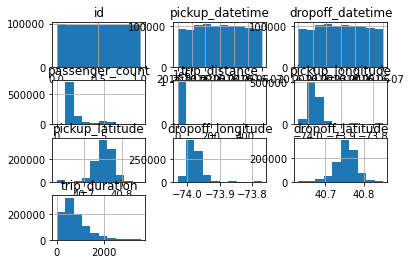

**Write your answers here:**\_****

In \[125\]:

    sns.boxplot(trips['trip_distance'])
    plt.show()

    C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

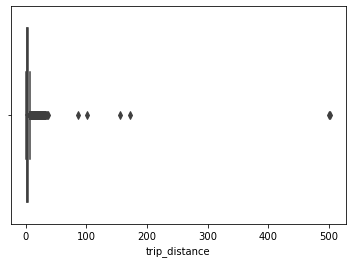

-   We can see there is an extreme outlier in the dataset, we drop
    investigate it further

In \[126\]:

    trips[trips['trip_distance']>100]

Out\[126\]:

|        | id     | vendor_id | pickup_datetime     | dropoff_datetime    | passenger_count | trip_distance | pickup_longitude | pickup_latitude | dropoff_longitude | dropoff_latitude | payment_type | trip_duration | pickup_neighborhood | dropoff_neighborhood |
|--------|--------|-----------|---------------------|---------------------|-----------------|---------------|------------------|-----------------|-------------------|------------------|--------------|---------------|---------------------|----------------------|
| 171143 | 178815 | 1         | 2016-02-04 14:05:10 | 2016-02-04 14:56:37 | 1               | 156.2         | -73.979149       | 40.765499       | -73.782806        | 40.644009        | 1            | 3087.0        | AR                  | G                    |
| 248346 | 259490 | 1         | 2016-02-18 09:48:06 | 2016-02-18 09:50:27 | 1               | 501.4         | -73.980087       | 40.782185       | -73.981468        | 40.778519        | 2            | 141.0         | I                   | AV                   |
| 525084 | 548884 | 1         | 2016-04-07 21:19:03 | 2016-04-07 22:03:17 | 3               | 172.3         | -73.783340       | 40.644176       | -73.936028        | 40.737762        | 2            | 2654.0        | G                   | AN                   |
| 530340 | 554389 | 1         | 2016-04-08 19:19:32 | 2016-04-08 19:41:33 | 2               | 502.8         | -73.995461       | 40.724884       | -73.986099        | 40.762108        | 1            | 1321.0        | X                   | AA                   |
| 828650 | 867217 | 1         | 2016-06-02 21:30:17 | 2016-06-02 21:36:47 | 2               | 101.0         | -73.961586       | 40.800968       | -73.950165        | 40.802193        | 2            | 390.0         | AH                  | J                    |

-   We can observe that, there are 2 observation\>500, and there is a
    huge gap in the trip duration for them.
-   Covering 501.4 distance in 141 sec, is not possible, it is better we
    can clip these values to 50.

#### Clipping the outliers of trip distance to 50<a href="#Clipping-the-outliers-of-trip-distance-to-50" class="anchor-link">¶</a>

In \[127\]:

    trips['trip_distance']=trips['trip_distance'].clip(trips['trip_distance'].min(),50)

In \[128\]:

    sns.boxplot(trips['trip_distance'])
    plt.show()

    C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

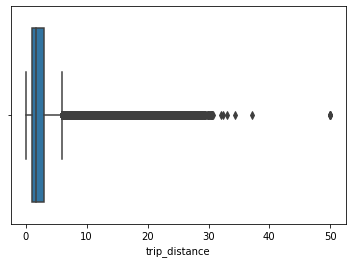

### Question 2.2 Plotting countplot for Passenger_count (1 Marks)<a href="#Question-2.2-Plotting-countplot-for-Passenger_count-(1-Marks)" class="anchor-link">¶</a>

In \[129\]:

    #Remove _________ and complete the code
    import seaborn as sns
    plt.figure(figsize=(20,5))
    sns.countplot(trips.passenger_count)
    plt.show()

    C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

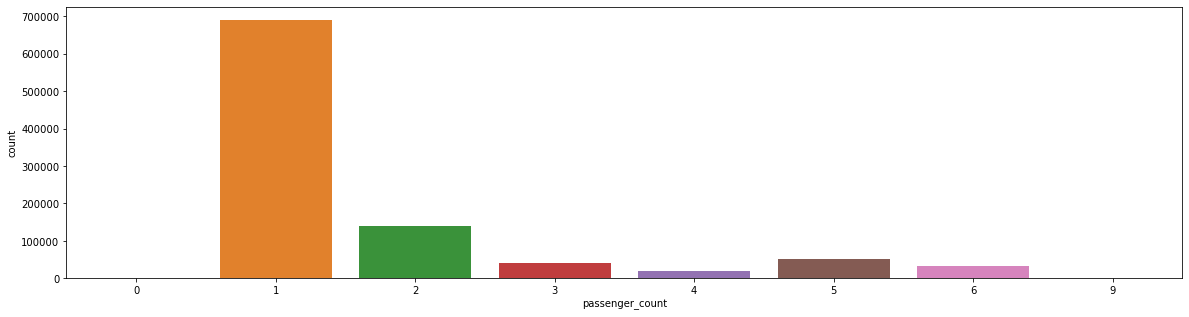

In \[130\]:

    trips.passenger_count.value_counts(normalize=True)

Out\[130\]:

    1    0.709334
    2    0.143419
    5    0.053409
    3    0.041140
    6    0.033334
    4    0.019338
    0    0.000025
    9    0.000002
    Name: passenger_count, dtype: float64

**Write your answers here:**\_****

### Question 2.3 Plotting countplot for pickup_neighborhood and dropoff_neighborhood (2 Marks)<a href="#Question-2.3-Plotting-countplot-for-pickup_neighborhood-and-dropoff_neighborhood-(2-Marks)" class="anchor-link">¶</a>

In \[131\]:

    #Remove _________ and complete the code
    trips.pickup_neighborhood.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(20,8))

Out\[131\]:

    <AxesSubplot:>

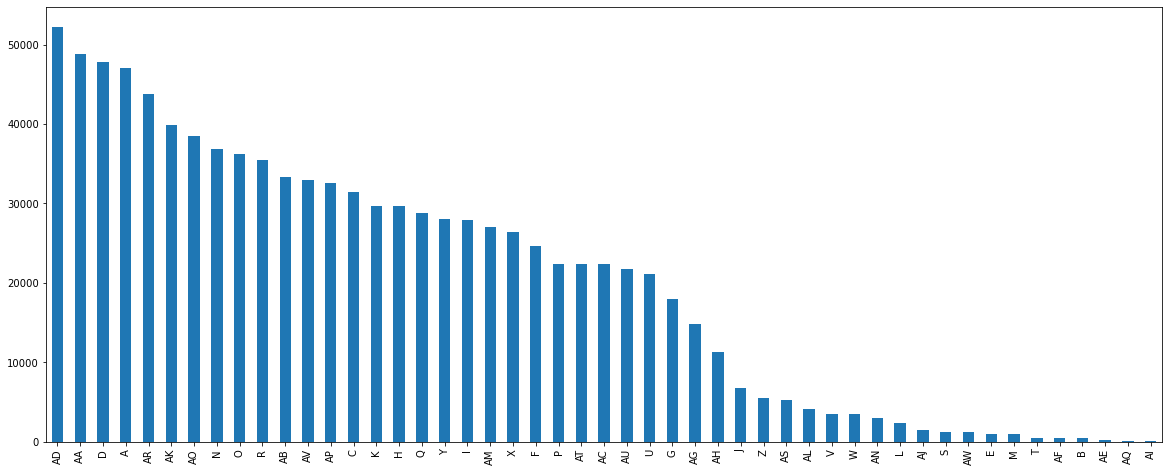

In \[132\]:

    #Remove _________ and complete the code

    trips.dropoff_neighborhood.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(20,8))

Out\[132\]:

    <AxesSubplot:>

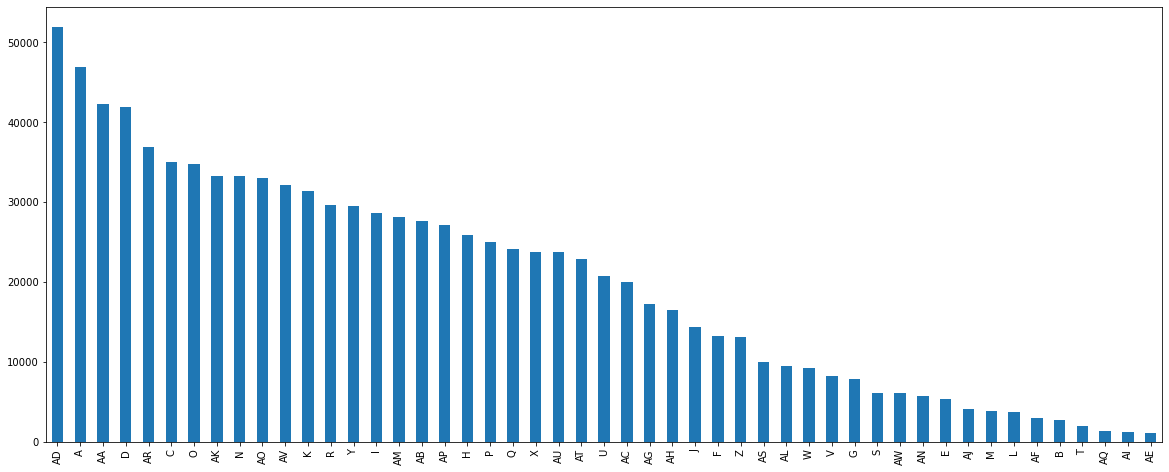

**Write your answers here:**\_****

In \[133\]:

    pickup_neighborhoods.head()

Out\[133\]:

|     | neighborhood_id | latitude  | longitude  |
|-----|-----------------|-----------|------------|
| 0   | AH              | 40.804349 | -73.961716 |
| 1   | Z               | 40.715828 | -73.954298 |
| 2   | D               | 40.750179 | -73.992557 |
| 3   | AT              | 40.729670 | -73.981693 |
| 4   | AG              | 40.749843 | -74.003458 |

### Bivariate analysis<a href="#Bivariate-analysis" class="anchor-link">¶</a>

#### Plot a scatter plot for trip distance and trip duration<a href="#Plot-a-scatter-plot-for-trip-distance-and-trip-duration" class="anchor-link">¶</a>

In \[134\]:

    sns.scatterplot(trips['trip_distance'],trips['trip_duration'])

    C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

Out\[134\]:

    <AxesSubplot:xlabel='trip_distance', ylabel='trip_duration'>

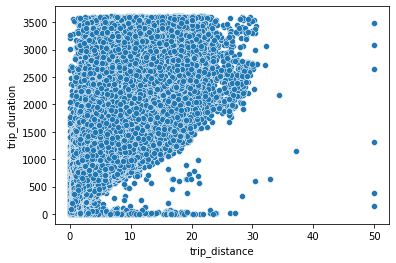

-   There is some positive correlation between trip_distance and
    trip_duration.

In \[135\]:

    sns.countplot(trips['passenger_count'],hue=trips['payment_type'])

    C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

Out\[135\]:

    <AxesSubplot:xlabel='passenger_count', ylabel='count'>

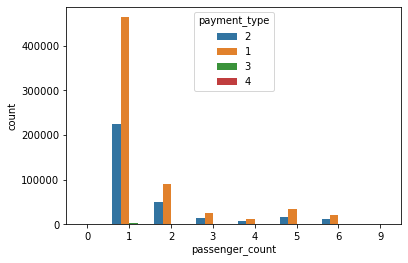

-   There is no such specific pattern can be observed.

### Step 2: Prepare the Data<a href="#Step-2:-Prepare-the-Data" class="anchor-link">¶</a>

Lets create entities and relationships. The three entities in this data
are

-   trips
-   pickup_neighborhoods
-   dropoff_neighborhoods

This data has the following relationships

-   pickup_neighborhoods --\> trips (one neighborhood can have multiple
    trips that start in it. This means pickup_neighborhoods is the
    `parent_entity` and trips is the child entity)
-   dropoff_neighborhoods --\> trips (one neighborhood can have multiple
    trips that end in it. This means dropoff_neighborhoods is the
    `parent_entity` and trips is the child entity)

In \<a
[href="https://www.featuretools.com/"](href=%22https://www.featuretools.com/%22)\<featuretools
(automated feature engineering software package)/\>\</a\>, we specify
the list of entities and relationships as follows:

### Question 3: Define entities and relationships for the Deep Feature Synthesis (2 Marks)<a href="#Question-3:-Define-entities-and-relationships-for-the-Deep-Feature-Synthesis-(2-Marks)" class="anchor-link">¶</a>

In \[139\]:

    entities = {
            "trips": (trips, "id", 'pickup_datetime' ),
            "pickup_neighborhoods": (pickup_neighborhoods, "neighborhood_id"),
            "dropoff_neighborhoods": (dropoff_neighborhoods, "neighborhood_id"),
            }

    relationships = [("pickup_neighborhoods", "neighborhood_id", "trips", "pickup_neighborhood"),
                     ("dropoff_neighborhoods", "neighborhood_id", "trips", "dropoff_neighborhood")]

Next, we specify the cutoff time for each instance of the target_entity,
in this case `trips`.This timestamp represents the last time data can be
used for calculating features by DFS. In this scenario, that would be
the pickup time because we would like to make the duration prediction
using data before the trip starts.

For the purposes of the case study, we choose to only select trips that
started after January 12th, 2016.

In \[140\]:

    cutoff_time = trips[['id', 'pickup_datetime']]
    cutoff_time = cutoff_time[cutoff_time['pickup_datetime'] > "2016-01-12"]
    preview(cutoff_time, 10)

Out\[140\]:

|        | id     | pickup_datetime     |
|--------|--------|---------------------|
| 54031  | 56311  | 2016-01-12 00:00:25 |
| 667608 | 698423 | 2016-05-03 17:59:59 |
| 667609 | 698424 | 2016-05-03 18:00:52 |
| 667610 | 698425 | 2016-05-03 18:01:06 |
| 667611 | 698426 | 2016-05-03 18:01:11 |
| 667612 | 698427 | 2016-05-03 18:01:12 |
| 667613 | 698428 | 2016-05-03 18:01:12 |
| 667614 | 698429 | 2016-05-03 18:01:24 |
| 667615 | 698430 | 2016-05-03 18:01:36 |
| 667616 | 698431 | 2016-05-03 18:01:39 |

### Step 3: Create baseline features using Deep Feature Synthesis<a href="#Step-3:-Create-baseline-features-using-Deep-Feature-Synthesis" class="anchor-link">¶</a>

Instead of manually creating features, such as "month of pickup
datetime", we can let DFS come up with them automatically. It does this
by

-   interpreting the variable types of the columns e.g categorical,
    numeric and others
-   matching the columns to the primitives that can be applied to their
    variable types
-   creating features based on these matches

**Create transform features using transform primitives**

As we described in the video, features fall into two major categories,
`transform` and `aggregate`. In featureools, we can create transform
features by specifying `transform` primitives. Below we specify a
`transform` primitive called `weekend` and here is what it does:

-   It can be applied to any `datetime` column in the data.
-   For each entry in the column, it assess if it is a `weekend` and
    returns a boolean.

In this specific data, there are two `datetime` columns
`pickup_datetime` and `dropoff_datetime`. The tool automatically creates
features using the primitive and these two columns as shown below.

### Question 4: Creating a baseline model with only 1 transform primitive (10 Marks)<a href="#Question-4:-Creating-a-baseline-model-with-only-1-transform-primitive-(10-Marks)" class="anchor-link">¶</a>

**Question: 4.1 Define transform primitive for weekend and define
features using dfs?**

In \[141\]:

    trans_primitives = [IsWeekend]

    features = ft.dfs(entities=entities,
                      relationships=relationships,
                      target_entity="trips",
                      trans_primitives=trans_primitives,
                      agg_primitives=[],
                      ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                                  "dropoff_latitude", "dropoff_longitude"]},
                      features_only=True)

*If you're interested about parameters to DFS such as
`ignore_variables`, you can learn more about these parameters
[here](https://docs.featuretools.com/generated/featuretools.dfs.html#featuretools.dfs)*

Here are the features created.

In \[142\]:

    print ("Number of features: %d" % len(features))
    features

    Number of features: 13

Out\[142\]:

    [<Feature: vendor_id>,
     <Feature: passenger_count>,
     <Feature: trip_distance>,
     <Feature: payment_type>,
     <Feature: trip_duration>,
     <Feature: pickup_neighborhood>,
     <Feature: dropoff_neighborhood>,
     <Feature: IS_WEEKEND(dropoff_datetime)>,
     <Feature: IS_WEEKEND(pickup_datetime)>,
     <Feature: pickup_neighborhoods.latitude>,
     <Feature: pickup_neighborhoods.longitude>,
     <Feature: dropoff_neighborhoods.latitude>,
     <Feature: dropoff_neighborhoods.longitude>]

Now let's compute the features.

**Question: 4.2 Compute features and define feature matrix**

In \[143\]:

    def compute_features(features, cutoff_time):
        # shuffle so we don't see encoded features in the front or backs

        np.random.shuffle(features)
        feature_matrix = ft.calculate_feature_matrix(features,
                                                     cutoff_time=cutoff_time,
                                                     approximate='36d',
                                                     verbose=True,entities=entities, relationships=relationships)
        print("Finishing computing...")
        feature_matrix, features = ft.encode_features(feature_matrix, features,
                                                      to_encode=["pickup_neighborhood", "dropoff_neighborhood"],
                                                      include_unknown=False)
        return feature_matrix

In \[144\]:

    #Remove _________ and complete the code
    feature_matrix1 = compute_features(features, cutoff_time)

    Elapsed: 00:05 | Progress: 100%|██████████
    Finishing computing...

In \[145\]:

    preview(feature_matrix1, 5)

Out\[145\]:

|        | vendor_id | pickup_neighborhoods.longitude | IS_WEEKEND(pickup_datetime) | payment_type | trip_duration | passenger_count | IS_WEEKEND(dropoff_datetime) | pickup_neighborhoods.latitude | trip_distance | dropoff_neighborhoods.longitude | ... | pickup_neighborhood = AD | pickup_neighborhood = AA | pickup_neighborhood = D | pickup_neighborhood = A | pickup_neighborhood = AR | pickup_neighborhood = AK | pickup_neighborhood = AO | pickup_neighborhood = N | pickup_neighborhood = O | pickup_neighborhood = R |
|--------|-----------|--------------------------------|-----------------------------|--------------|---------------|-----------------|------------------------------|-------------------------------|---------------|---------------------------------|-----|--------------------------|--------------------------|-------------------------|-------------------------|--------------------------|--------------------------|--------------------------|-------------------------|-------------------------|-------------------------|
| id     |           |                                |                             |              |               |                 |                              |                               |               |                                 |     |                          |                          |                         |                         |                          |                          |                          |                         |                         |                         |
| 56311  | 2         | -73.987205                     | False                       | 1            | 645.0         | 1               | False                        | 40.720245                     | 1.61          | -73.998366                      | ... | False                    | False                    | False                   | False                   | False                    | False                    | False                    | False                   | False                   | False                   |
| 698423 | 2         | -73.966696                     | False                       | 2            | 523.0         | 1               | False                        | 40.764723                     | 1.12          | -73.976515                      | ... | False                    | False                    | False                   | False                   | False                    | True                     | False                    | False                   | False                   | False                   |
| 698424 | 2         | -73.966696                     | False                       | 2            | 155.0         | 1               | False                        | 40.764723                     | 0.68          | -73.960551                      | ... | False                    | False                    | False                   | False                   | False                    | True                     | False                    | False                   | False                   | False                   |
| 698425 | 1         | -73.969822                     | False                       | 1            | 225.0         | 1               | False                        | 40.793597                     | 1.00          | -73.969822                      | ... | False                    | False                    | False                   | False                   | False                    | False                    | False                    | False                   | False                   | False                   |
| 698426 | 1         | -73.956886                     | False                       | 2            | 372.0         | 2               | False                        | 40.766809                     | 0.70          | -73.956886                      | ... | False                    | False                    | False                   | False                   | False                    | False                    | False                    | False                   | False                   | False                   |

5 rows × 31 columns

In \[146\]:

    feature_matrix1.shape

Out\[146\]:

    (920378, 31)

### Build the Model<a href="#Build-the-Model" class="anchor-link">¶</a>

To build a model, we

-   Separate the data into a portion for `training` (75% in this case)
    and a portion for `testing`
-   Get the log of the trip duration so that a more linear relationship
    can be found.
-   Train a model using a
    `Linear Regression, Decision Tree and Random Forest model`

#### Transforming the duration variable on sqrt and log<a href="#Transforming-the-duration-variable-on-sqrt-and-log" class="anchor-link">¶</a>

In \[108\]:

    plt.hist(np.sqrt(trips['trip_duration']))

Out\[108\]:

    (array([  4566.,  35831., 163872., 249551., 225381., 149544.,  80472.,
             38481.,  18054.,   8657.]),
     array([ 1.        ,  6.90499792, 12.80999584, 18.71499376, 24.61999167,
            30.52498959, 36.42998751, 42.33498543, 48.23998335, 54.14498127,
            60.04997918]),
     <BarContainer object of 10 artists>)

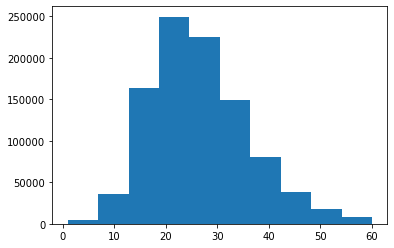

In \[109\]:

    plt.hist(np.log(trips['trip_duration']))

Out\[109\]:

    (array([1.81000e+02, 5.97000e+02, 7.44000e+02, 1.43900e+03, 2.86700e+03,
            2.00260e+04, 1.35785e+05, 3.69738e+05, 3.50815e+05, 9.22170e+04]),
     array([0.        , 0.81903544, 1.63807088, 2.45710632, 3.27614176,
            4.0951772 , 4.91421264, 5.73324808, 6.55228352, 7.37131896,
            8.1903544 ]),
     <BarContainer object of 10 artists>)

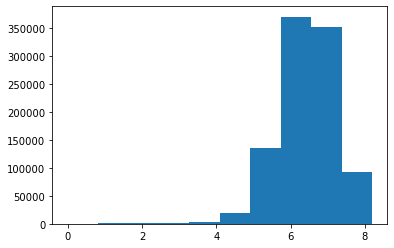

-   We can clearly see that the sqrt transformation is giving nearly
    normal distribution, there for we can choose the sqrt transformation
    on the dependent(trip_duration) variable.

### Splitting the data into train and test<a href="#Splitting-the-data-into-train-and-test" class="anchor-link">¶</a>

In \[147\]:

    # separates the whole feature matrix into train data feature matrix, 
    # train data labels, and test data feature matrix 
    X_train, y_train, X_test, y_test = get_train_test_fm(feature_matrix1,.75)
    y_train = np.sqrt(y_train)
    y_test = np.sqrt(y_test)

### Defining function for to check the performance of the model.<a href="#Defining-function-for-to-check-the-performance-of-the-model." class="anchor-link">¶</a>

In \[151\]:

    #RMSE
    def rmse(predictions, targets):
        return np.sqrt(((targets - predictions) ** 2).mean())

    # MAE
    def mae(predictions, targets):
        return np.mean(np.abs((targets - predictions)))


    # Model Performance on test and train data
    def model_pref(model, x_train, x_test, y_train,y_test):

        # Insample Prediction
        y_pred_train = model.predict(x_train)
        y_observed_train = y_train

        # Prediction on test data
        y_pred_test = model.predict(x_test)
        y_observed_test = y_test

        print(
            pd.DataFrame(
                {
                    "Data": ["Train", "Test"],
                    'RSquared':
                        [r2_score(y_observed_train,y_pred_train),
                        r2_score(y_observed_test,y_pred_test )
                        ],
                    "RMSE": [
                        rmse(y_pred_train, y_observed_train),
                        rmse(y_pred_test, y_observed_test),
                    ],
                    "MAE": [
                        mae(y_pred_train, y_observed_train),
                        mae(y_pred_test, y_observed_test),
                    ],
                }
            )
        )

#### Question 4.3 Build Linear regression using only weekend transform primitive<a href="#Question-4.3-Build-Linear-regression-using-only-weekend-transform-primitive" class="anchor-link">¶</a>

In \[153\]:

    #Remove _________ and complete the code

    #defining the model

    lr1=LinearRegression()

    #fitting the model
    lr1.fit(X_train,y_train)

Out\[153\]:

    LinearRegression()

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[154\]:

    #Remove _________ and complete the code
    model_pref(lr1, X_train, X_test,y_train,y_test)  

        Data  RSquared      RMSE       MAE
    0  Train  0.576106  6.132169  4.736641
    1   Test  0.555831  6.558806  5.024874

**Write your answers here:**\_****

#### Question 4.4 Building decision tree using only weekend transform primitive<a href="#Question-4.4-Building-decision-tree-using-only-weekend-transform-primitive" class="anchor-link">¶</a>

In \[155\]:

    #Remove _________ and complete the code

    #define the model
    dt= DecisionTreeRegressor()

    #fit the model

    dt.fit(X_train,y_train)

Out\[155\]:

    DecisionTreeRegressor()

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[156\]:

    #Remove _________ and complete the code
    model_pref(dt, X_train, X_test,y_train,y_test)   

        Data  RSquared      RMSE       MAE
    0  Train  0.917069  2.712331  1.518055
    1   Test  0.597606  6.242755  4.638805

**Write your answers here:**\_****

#### Question 4.5 Building Pruned decision tree using only weekend transform primitive<a href="#Question-4.5-Building-Pruned-decision-tree-using-only-weekend-transform-primitive" class="anchor-link">¶</a>

In \[157\]:

    #Remove _________ and complete the code
    #define the model

    #use max_depth=7
    dt_pruned=DecisionTreeRegressor(max_depth=3)

    #fit the model
    dt_pruned.fit(X_train,y_train)

Out\[157\]:

    DecisionTreeRegressor(max_depth=3)

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[158\]:

    #Remove _________ and complete the code
    model_pref(dt_pruned, X_train, X_test,y_train,y_test)  

        Data  RSquared      RMSE       MAE
    0  Train  0.678355  5.341631  4.093317
    1   Test  0.646495  5.851243  4.445388

**Write your answers here:**\_****

#### Question 4.6 Building Random Forest using only weekend transform primitive<a href="#Question-4.6-Building-Random-Forest-using-only-weekend-transform-primitive" class="anchor-link">¶</a>

In \[159\]:

    #Remove _________ and complete the code

    #define the model

    #using (n_estimators=60,max_depth=7)

    rf=RandomForestRegressor(n_estimators=60,max_depth=7)

In \[160\]:

    #fit the model

    #Remove _________ and complete the code
    rf.fit(X_train,y_train)

Out\[160\]:

    RandomForestRegressor(max_depth=7, n_estimators=60)

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[161\]:

    #Remove _________ and complete the code

    model_pref(rf, X_train, X_test,y_train,y_test)

        Data  RSquared      RMSE       MAE
    0  Train  0.738200  4.819146  3.676471
    1   Test  0.708148  5.316569  4.019897

**Write your answers here:**\_****

### Step 4: Adding more Transform Primitives and creating new model<a href="#Step-4:-Adding-more-Transform-Primitives-and-creating-new-model" class="anchor-link">¶</a>

-   Add `Minute`, `Hour`, `Month`, `Weekday` , etc primitives
-   All these transform primitives apply to `datetime` columns

### Question 5: Create models with more transform primitives (10 Marks)<a href="#Question-5:-Create-models-with-more-transform-primitives-(10-Marks)" class="anchor-link">¶</a>

**Question 5.1 Define more transform primitives and define features
using dfs?**

In \[162\]:

    #Remove _________ and complete the code
    trans_primitives = [Minute, Hour, Day, Month, Weekday, IsWeekend]

    #Remove _________ and complete the code
    features = ft.dfs(entities=entities,
                      relationships=relationships,
                      target_entity="trips",
                      trans_primitives=trans_primitives,
                      agg_primitives=[],
                      ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                                  "dropoff_latitude", "dropoff_longitude"]},
                      features_only=True)

In \[ \]:

    print ("Number of features: %d" % len(features))
    features

Now let's compute the features.

**Question: 5.2 Compute features and define feature matrix**

In \[163\]:

    #Remove _________ and complete the code
    feature_matrix2 = compute_features(features, cutoff_time)

    Elapsed: 00:09 | Progress: 100%|██████████
    Finishing computing...

In \[164\]:

    feature_matrix2.shape

Out\[164\]:

    (920378, 41)

In \[165\]:

    feature_matrix2.head()

Out\[165\]:

|       | IS_WEEKEND(dropoff_datetime) | DAY(pickup_datetime) | WEEKDAY(dropoff_datetime) | MONTH(dropoff_datetime) | MINUTE(dropoff_datetime) | passenger_count | payment_type | dropoff_neighborhood = AD | dropoff_neighborhood = A | dropoff_neighborhood = AA | ... | WEEKDAY(pickup_datetime) | pickup_neighborhoods.latitude | vendor_id | MINUTE(pickup_datetime) | HOUR(dropoff_datetime) | dropoff_neighborhoods.longitude | DAY(dropoff_datetime) | MONTH(pickup_datetime) | IS_WEEKEND(pickup_datetime) | pickup_neighborhoods.longitude |
|-------|------------------------------|----------------------|---------------------------|-------------------------|--------------------------|-----------------|--------------|---------------------------|--------------------------|---------------------------|-----|--------------------------|-------------------------------|-----------|-------------------------|------------------------|---------------------------------|-----------------------|------------------------|-----------------------------|--------------------------------|
| id    |                              |                      |                           |                         |                          |                 |              |                           |                          |                           |     |                          |                               |           |                         |                        |                                 |                       |                        |                             |                                |
| 56311 | False                        | 12                   | 1                         | 1                       | 11                       | 1               | 1            | False                     | False                    | False                     | ... | 1                        | 40.720245                     | 2         | 0                       | 0                      | -73.998366                      | 12                    | 1                      | False                       | -73.987205                     |
| 56312 | False                        | 12                   | 1                         | 1                       | 23                       | 1               | 2            | False                     | False                    | False                     | ... | 1                        | 40.646194                     | 2         | 2                       | 0                      | -73.954298                      | 12                    | 1                      | False                       | -73.785073                     |
| 56313 | False                        | 12                   | 1                         | 1                       | 5                        | 1               | 1            | False                     | False                    | False                     | ... | 1                        | 40.818445                     | 1         | 2                       | 0                      | -73.948046                      | 12                    | 1                      | False                       | -73.948046                     |
| 56314 | False                        | 12                   | 1                         | 1                       | 6                        | 5               | 2            | False                     | False                    | False                     | ... | 1                        | 40.729652                     | 2         | 2                       | 0                      | -73.977943                      | 12                    | 1                      | False                       | -73.991595                     |
| 56315 | False                        | 12                   | 1                         | 1                       | 13                       | 1               | 1            | False                     | False                    | False                     | ... | 1                        | 40.793597                     | 2         | 3                       | 0                      | -73.948046                      | 12                    | 1                      | False                       | -73.969822                     |

5 rows × 41 columns

### Build the new models more transform features<a href="#Build-the-new-models-more-transform-features" class="anchor-link">¶</a>

In \[166\]:

    # separates the whole feature matrix into train data feature matrix,
    # train data labels, and test data feature matrix 
    X_train2, y_train2, X_test2, y_test2 = get_train_test_fm(feature_matrix2,.75)
    y_train2 = np.sqrt(y_train2)
    y_test2 = np.sqrt(y_test2)

#### Question 5.3 Building Linear regression using more transform primitive<a href="#Question-5.3-Building-Linear-regression-using-more-transform-primitive" class="anchor-link">¶</a>

In \[167\]:

    #Remove _________ and complete the code

    #defining the model

    lr2= LinearRegression()

    #fitting the model
    lr2.fit(X_train2,y_train2)

Out\[167\]:

    LinearRegression()

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[168\]:

    #Remove _________ and complete the code
    model_pref(lr2, X_train2, X_test2,y_train2,y_test2)  

        Data  RSquared      RMSE       MAE
    0  Train  0.623501  5.779195  4.273127
    1   Test  0.623651  6.037346  4.537582

**Write your answers here:**\_****

#### Question 5.4 Building Decision tree using more transform primitive<a href="#Question-5.4-Building-Decision-tree-using-more-transform-primitive" class="anchor-link">¶</a>

In \[169\]:

    #Remove _________ and complete the code

    #define the model
    dt2= DecisionTreeRegressor()

    #fit the model

    dt2.fit(X_train2,y_train2)

Out\[169\]:

    DecisionTreeRegressor()

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[170\]:

    #Remove _________ and complete the code
    model_pref(dt2, X_train2, X_test2,y_train2,y_test2)  

        Data  RSquared      RMSE       MAE
    0  Train  1.000000  0.001479  0.000004
    1   Test  0.713059  5.271649  3.792940

**Write your answers here:**\_****

#### Question 5.5 Building Pruned Decision tree using more transform primitive<a href="#Question-5.5-Building-Pruned-Decision-tree-using-more-transform-primitive" class="anchor-link">¶</a>

In \[171\]:

    #Remove _________ and complete the code
    #define the model

    #use max_depth=7
    dt_pruned2= DecisionTreeRegressor(max_depth=4)

    #fit the model
    dt_pruned2.fit(X_train2,y_train2)

Out\[171\]:

    DecisionTreeRegressor(max_depth=4)

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[172\]:

    #Remove _________ and complete the code
    model_pref(dt_pruned2, X_train2, X_test2,y_train2,y_test2)  

        Data  RSquared      RMSE       MAE
    0  Train  0.707305  5.095575  3.910334
    1   Test  0.679915  5.567791  4.227597

**Write your answers here:**\_****

#### Question 5.6 Building Random Forest using more transform primitive<a href="#Question-5.6-Building-Random-Forest-using-more-transform-primitive" class="anchor-link">¶</a>

In \[177\]:

    #fit the model

    #Remove _________ and complete the code
    #using (n_estimators=60,max_depth=7)

    rf2 = RandomForestRegressor(n_estimators=60,max_depth=4)

    #fit the model

    #Remove _________ and complete the code
    rf2.fit(X_train2,y_train2)

Out\[177\]:

    RandomForestRegressor(max_depth=4, n_estimators=60)

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[178\]:

    #Remove _________ and complete the code
    model_pref(rf2, X_train2, X_test2,y_train2,y_test2)  

        Data  RSquared      RMSE       MAE
    0  Train  0.712007  5.054482  3.873747
    1   Test  0.684524  5.527560  4.190881

**Write your answers here:**\_****

**Question: 5.7 Comment on how the modeling accuracy differs when
including more transform features.**

**Write your answers here:**\_****

### Step 5: Add Aggregation Primitives<a href="#Step-5:-Add-Aggregation-Primitives" class="anchor-link">¶</a>

Now let's add aggregation primitives. These primitives will generate
features for the parent entities `pickup_neighborhoods`, and
`dropoff_neighborhood` and then add them to the trips entity, which is
the entity for which we are trying to make prediction.

### Question 6: Create a Models with transform and aggregate primitive. (10 Marks)<a href="#Question-6:-Create-a-Models-with-transform-and-aggregate-primitive.-(10-Marks)" class="anchor-link">¶</a>

**6.1 Define more transform and aggregate primitive and define features
using dfs?**

In \[179\]:

    #Remove _________ and complete the code

    trans_primitives = [Minute, Hour, Day, Month, Weekday, IsWeekend]
    aggregation_primitives = [Count, Sum, Mean, Median, Std, Max, Min]

    features = ft.dfs(entities=entities,
                      relationships=relationships,
                      target_entity="trips",
                      trans_primitives=trans_primitives,
                      agg_primitives=aggregation_primitives,
                      ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                                  "dropoff_latitude", "dropoff_longitude"]},
                      features_only=True)

In \[180\]:

    print ("Number of features: %d" % len(features))
    features

    Number of features: 61

Out\[180\]:

    [<Feature: vendor_id>,
     <Feature: passenger_count>,
     <Feature: trip_distance>,
     <Feature: payment_type>,
     <Feature: trip_duration>,
     <Feature: pickup_neighborhood>,
     <Feature: dropoff_neighborhood>,
     <Feature: DAY(dropoff_datetime)>,
     <Feature: DAY(pickup_datetime)>,
     <Feature: HOUR(dropoff_datetime)>,
     <Feature: HOUR(pickup_datetime)>,
     <Feature: IS_WEEKEND(dropoff_datetime)>,
     <Feature: IS_WEEKEND(pickup_datetime)>,
     <Feature: MINUTE(dropoff_datetime)>,
     <Feature: MINUTE(pickup_datetime)>,
     <Feature: MONTH(dropoff_datetime)>,
     <Feature: MONTH(pickup_datetime)>,
     <Feature: WEEKDAY(dropoff_datetime)>,
     <Feature: WEEKDAY(pickup_datetime)>,
     <Feature: pickup_neighborhoods.latitude>,
     <Feature: pickup_neighborhoods.longitude>,
     <Feature: dropoff_neighborhoods.latitude>,
     <Feature: dropoff_neighborhoods.longitude>,
     <Feature: pickup_neighborhoods.COUNT(trips)>,
     <Feature: pickup_neighborhoods.MAX(trips.passenger_count)>,
     <Feature: pickup_neighborhoods.MAX(trips.trip_distance)>,
     <Feature: pickup_neighborhoods.MAX(trips.trip_duration)>,
     <Feature: pickup_neighborhoods.MEAN(trips.passenger_count)>,
     <Feature: pickup_neighborhoods.MEAN(trips.trip_distance)>,
     <Feature: pickup_neighborhoods.MEAN(trips.trip_duration)>,
     <Feature: pickup_neighborhoods.MEDIAN(trips.passenger_count)>,
     <Feature: pickup_neighborhoods.MEDIAN(trips.trip_distance)>,
     <Feature: pickup_neighborhoods.MEDIAN(trips.trip_duration)>,
     <Feature: pickup_neighborhoods.MIN(trips.passenger_count)>,
     <Feature: pickup_neighborhoods.MIN(trips.trip_distance)>,
     <Feature: pickup_neighborhoods.MIN(trips.trip_duration)>,
     <Feature: pickup_neighborhoods.STD(trips.passenger_count)>,
     <Feature: pickup_neighborhoods.STD(trips.trip_distance)>,
     <Feature: pickup_neighborhoods.STD(trips.trip_duration)>,
     <Feature: pickup_neighborhoods.SUM(trips.passenger_count)>,
     <Feature: pickup_neighborhoods.SUM(trips.trip_distance)>,
     <Feature: pickup_neighborhoods.SUM(trips.trip_duration)>,
     <Feature: dropoff_neighborhoods.COUNT(trips)>,
     <Feature: dropoff_neighborhoods.MAX(trips.passenger_count)>,
     <Feature: dropoff_neighborhoods.MAX(trips.trip_distance)>,
     <Feature: dropoff_neighborhoods.MAX(trips.trip_duration)>,
     <Feature: dropoff_neighborhoods.MEAN(trips.passenger_count)>,
     <Feature: dropoff_neighborhoods.MEAN(trips.trip_distance)>,
     <Feature: dropoff_neighborhoods.MEAN(trips.trip_duration)>,
     <Feature: dropoff_neighborhoods.MEDIAN(trips.passenger_count)>,
     <Feature: dropoff_neighborhoods.MEDIAN(trips.trip_distance)>,
     <Feature: dropoff_neighborhoods.MEDIAN(trips.trip_duration)>,
     <Feature: dropoff_neighborhoods.MIN(trips.passenger_count)>,
     <Feature: dropoff_neighborhoods.MIN(trips.trip_distance)>,
     <Feature: dropoff_neighborhoods.MIN(trips.trip_duration)>,
     <Feature: dropoff_neighborhoods.STD(trips.passenger_count)>,
     <Feature: dropoff_neighborhoods.STD(trips.trip_distance)>,
     <Feature: dropoff_neighborhoods.STD(trips.trip_duration)>,
     <Feature: dropoff_neighborhoods.SUM(trips.passenger_count)>,
     <Feature: dropoff_neighborhoods.SUM(trips.trip_distance)>,
     <Feature: dropoff_neighborhoods.SUM(trips.trip_duration)>]

**Question: 6.2 Compute features and define feature matrix**

In \[181\]:

    #Remove _________ and complete the code
    feature_matrix3 = compute_features(features, cutoff_time)

    Elapsed: 00:14 | Progress: 100%|██████████
    Finishing computing...

In \[182\]:

    feature_matrix3.head()

Out\[182\]:

|       | vendor_id | MONTH(dropoff_datetime) | HOUR(pickup_datetime) | WEEKDAY(dropoff_datetime) | pickup_neighborhoods.MEDIAN(trips.trip_duration) | dropoff_neighborhoods.MAX(trips.trip_distance) | dropoff_neighborhoods.SUM(trips.trip_distance) | pickup_neighborhoods.STD(trips.trip_duration) | dropoff_neighborhood = AD | dropoff_neighborhood = A | ... | pickup_neighborhoods.MIN(trips.trip_duration) | dropoff_neighborhoods.MIN(trips.trip_duration) | pickup_neighborhoods.SUM(trips.trip_duration) | pickup_neighborhoods.STD(trips.trip_distance) | payment_type | pickup_neighborhoods.COUNT(trips) | dropoff_neighborhoods.MEAN(trips.trip_distance) | pickup_neighborhoods.MAX(trips.passenger_count) | dropoff_neighborhoods.STD(trips.trip_distance) | dropoff_neighborhoods.COUNT(trips) |
|-------|-----------|-------------------------|-----------------------|---------------------------|--------------------------------------------------|------------------------------------------------|------------------------------------------------|-----------------------------------------------|---------------------------|--------------------------|-----|-----------------------------------------------|------------------------------------------------|-----------------------------------------------|-----------------------------------------------|--------------|-----------------------------------|-------------------------------------------------|-------------------------------------------------|------------------------------------------------|------------------------------------|
| id    |           |                         |                       |                           |                                                  |                                                |                                                |                                               |                           |                          |     |                                               |                                                |                                               |                                               |              |                                   |                                                 |                                                 |                                                |                                    |
| 56311 | 2         | 1                       | 0                     | 1                         | 682.5                                            | 20.54                                          | 3387.55                                        | 429.103720                                    | False                     | False                    | ... | 5.0                                           | 1.0                                            | 965650.0                                      | 2.536758                                      | 1            | 1298                              | 2.603805                                        | 6                                               | 2.776637                                       | 1301                               |
| 56312 | 2         | 1                       | 0                     | 1                         | 2086.0                                           | 19.00                                          | 3656.40                                        | 788.720284                                    | False                     | False                    | ... | 1.0                                           | 4.0                                            | 2581191.0                                     | 5.243534                                      | 2            | 1250                              | 4.907919                                        | 6                                               | 3.830819                                       | 745                                |
| 56313 | 1         | 1                       | 0                     | 1                         | 513.0                                            | 25.30                                          | 2495.91                                        | 526.288091                                    | False                     | False                    | ... | 6.0                                           | 6.0                                            | 146585.0                                      | 2.942660                                      | 1            | 218                               | 4.865322                                        | 6                                               | 3.705997                                       | 513                                |
| 56314 | 2         | 1                       | 0                     | 1                         | 587.0                                            | 19.16                                          | 3614.13                                        | 425.565644                                    | False                     | False                    | ... | 2.0                                           | 9.0                                            | 1156824.0                                     | 2.185074                                      | 2            | 1703                              | 2.019067                                        | 6                                               | 2.399295                                       | 1790                               |
| 56315 | 2         | 1                       | 0                     | 1                         | 501.0                                            | 25.30                                          | 2495.91                                        | 417.894779                                    | False                     | False                    | ... | 13.0                                          | 6.0                                            | 721542.0                                      | 2.057285                                      | 1            | 1176                              | 4.865322                                        | 6                                               | 3.705997                                       | 513                                |

5 rows × 79 columns

### Build the new models more transform and aggregate features<a href="#Build-the-new-models-more-transform-and-aggregate-features" class="anchor-link">¶</a>

In \[183\]:

    # separates the whole feature matrix into train data feature matrix,
    # train data labels, and test data feature matrix 
    X_train3, y_train3, X_test3, y_test3 = get_train_test_fm(feature_matrix3,.75)
    y_train3 = np.sqrt(y_train3)
    y_test3 = np.sqrt(y_test3)

#### Question 6.3 Building Linear regression model with transform and aggregate primitive.<a href="#Question-6.3-Building--Linear-regression-model-with-transform-and-aggregate-primitive." class="anchor-link">¶</a>

In \[184\]:

    #Remove _________ and complete the code

    #defining the model

    lr3= LinearRegression()

    #fitting the model
    lr3.fit(X_train3,y_train3)

Out\[184\]:

    LinearRegression()

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[185\]:

    #Remove _________ and complete the code
    model_pref(lr3, X_train3, X_test3,y_train3,y_test3)  

        Data  RSquared      RMSE       MAE
    0  Train  0.643423  5.624220  4.134927
    1   Test  0.631697  5.972457  4.464424

**Write your answers here: Model isn't overfitting RMSE is 5.62 and MAE
is close to 4**

#### Question 6.4 Building Decision tree with transform and aggregate primitive.<a href="#Question-6.4-Building--Decision-tree-with-transform-and-aggregate-primitive." class="anchor-link">¶</a>

In \[188\]:

    #Remove _________ and complete the code

    #define the model
    dt3= DecisionTreeRegressor()

    #fit the model

    dt3.fit(X_train3,y_train3)

Out\[188\]:

    DecisionTreeRegressor()

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[187\]:

    #Remove _________ and complete the code
    model_pref(dt3, X_train3, X_test3,y_train3,y_test3)  

        Data  RSquared      RMSE       MAE
    0  Train  1.000000  0.001479  0.000004
    1   Test  0.648653  5.833356  4.190826

**Write your answers here: Overfitted data**

#### Question 6.5 Building Pruned Decision tree with transform and aggregate primitive.<a href="#Question-6.5-Building--Pruned-Decision-tree-with-transform-and-aggregate-primitive." class="anchor-link">¶</a>

In \[191\]:

    #Remove _________ and complete the code
    #define the model

    #use max_depth=7
    dt_pruned3= DecisionTreeRegressor(max_depth=7)


    #fit the model
    dt_pruned3.fit(X_train3,y_train3)

Out\[191\]:

    DecisionTreeRegressor(max_depth=7)

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[192\]:

    #Remove _________ and complete the code
    model_pref(dt_pruned3, X_train3, X_test3,y_train3,y_test3)  

        Data  RSquared      RMSE       MAE
    0  Train  0.769212  4.524722  3.418452
    1   Test  0.745722  4.962549  3.696122

**Write your answers here:**\_** Data isn't overfitted as RMSE is 4.5
and MAE is 3.4 or less than 4**

#### Question 6.6 Building Random Forest with transform and aggregate primitive.<a href="#Question-6.6-Building--Random-Forest-with-transform-and-aggregate-primitive." class="anchor-link">¶</a>

In \[195\]:

    #fit the model

    #Remove _________ and complete the code
    #using (n_estimators=60,max_depth=7)

    rf3 = RandomForestRegressor(n_estimators=60,max_depth=7)
    #fit the model

    #Remove _________ and complete the code
    rf3.fit(X_train3,y_train3)

Out\[195\]:

    RandomForestRegressor(max_depth=7, n_estimators=60)

#### Check the performance of the model<a href="#Check-the-performance-of-the-model" class="anchor-link">¶</a>

In \[196\]:

    model_pref(rf3, X_train3, X_test3,y_train3,y_test3)  

        Data  RSquared      RMSE       MAE
    0  Train  0.776226  4.455440  3.356946
    1   Test  0.753177  4.889265  3.635551

**Write your answers here:**\_** A small improvement of 0.07 took place,
the model didn't see a great improvement**

**Question 6.7 How do these aggregate transforms impact performance? How
do they impact training time?**

**Write your answers here:**\_** A small improvement for a larger
training time does not seem to be a goof trade off**

#### Based on the above 3 models, we can make predictions using our model2, as it is giving almost same accuracy as model3 and also the training time is not that large as compared to model3<a href="#Based-on-the-above-3-models,-we-can-make-predictions-using-our-model2,-as-it-is-giving-almost-same-accuracy-as-model3-and-also-the-training-time-is-not-that-large-as-compared-to-model3" class="anchor-link">¶</a>

In \[197\]:

    y_pred = rf2.predict(X_test2)
    y_pred = y_pred**2 # undo the sqrt we took earlier
    y_pred[5:]

Out\[197\]:

    array([ 494.91321254,  247.9965683 ,  542.18383093, ...,  163.53405415,
            958.47522369, 1360.75397283])

### Question 7: What are some important features based on model2 and how can they affect the duration of the rides? (3 Marks)<a href="#Question-7:-What-are-some-important-features-based-on-model2-and-how-can-they-affect-the-duration-of-the-rides?-(3-Marks)" class="anchor-link">¶</a>

In \[199\]:

    feature_importances(rf2, feature_matrix2.drop(['trip_duration'],axis=1).columns, n=10)

    1: Feature: trip_distance, 0.971
    2: Feature: HOUR(dropoff_datetime), 0.026
    3: Feature: dropoff_neighborhoods.latitude, 0.003
    4: Feature: HOUR(pickup_datetime), 0.000
    5: Feature: IS_WEEKEND(dropoff_datetime), 0.000
    6: Feature: DAY(pickup_datetime), 0.000
    7: Feature: WEEKDAY(dropoff_datetime), 0.000
    8: Feature: MONTH(dropoff_datetime), 0.000
    9: Feature: MINUTE(dropoff_datetime), 0.000
    10: Feature: passenger_count, 0.000

**Write your answers here:**\_** trip duration is the most important
feature with the most significant effect on the model. The longer the
tripthe longer the duration of the trip**

In \[ \]: